In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
spotifyData = pd.read_csv('spotify.csv')
spotifyData.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
5         0.688  0.4810  ...    -8.807     1       0.1050        0.2890   
6         0.407  0.1470  ...    -8.822     1       0.0355        0.8570   
7         0.703  0.4440  ...    -9.331     1       0.0417        0.5590   
8         0.625  0.4140  ...    -8.700     1       0.0369        0.2940   
9         0.442  0.6320  ...    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580   0.7150   87.917               4     acoustic  
1          0.000006    0.1010   0.2670   77.489               4     acoustic  
2          0.000000    0.1170   0.1200   76.332               4     acoustic  
3          0.000071    0.1320   0.1430  181.740               3     acoustic  
4          0.000000    0.0829   0.1670  119.949               4     acoustic  
5          0.000000    0.1890   0.6660   98.017               4     acoustic  
6          0.000003    0.0913   0.0765  141.284               3     acoustic  
7          0.000000    0.0973   0.7120  150.960               4     acoustic  
8          0.000000    0.1510   0.6690  130.088               4     acoustic  
9          0.004190    0.0735   0.1960   78.899               4     acoustic  

[10 rows x 21 columns]

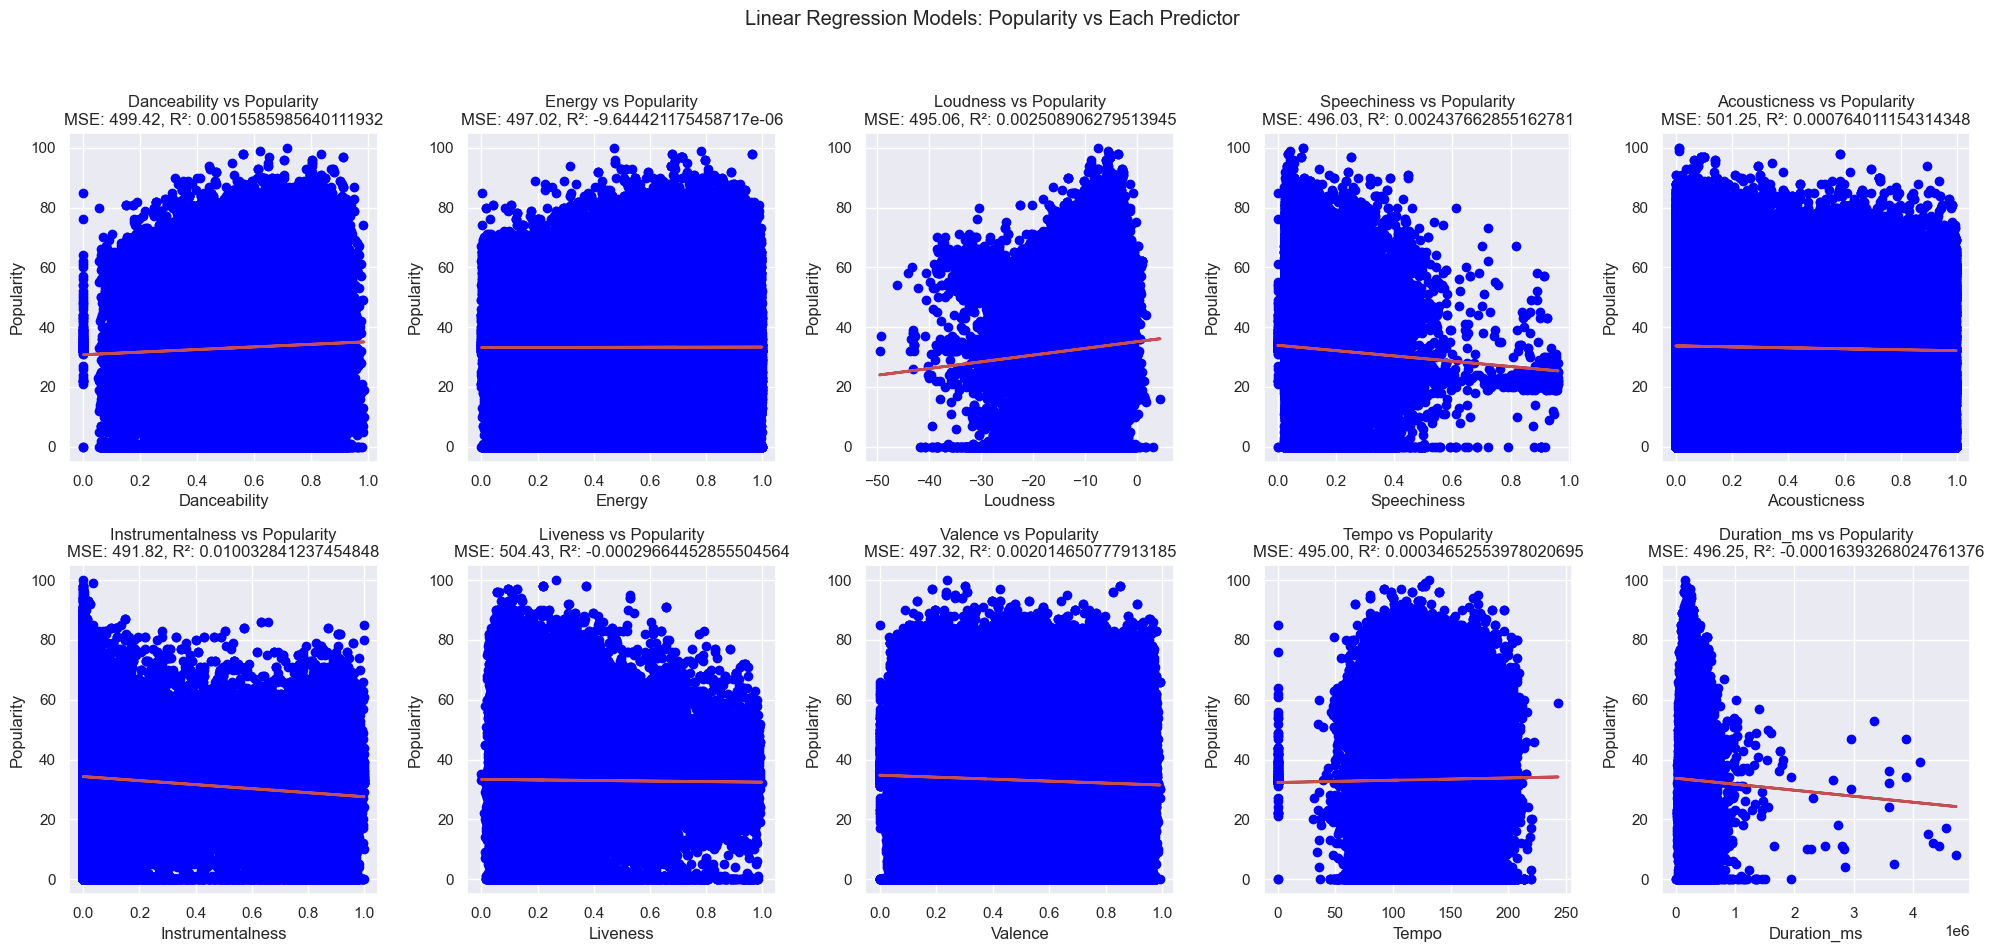

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# List of potential predictors
predictor_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

# Set up a 2x5 grid for subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Linear Regression Models: Popularity vs Each Predictor")

# Loop through each predictor and add to the grid
for idx, predictor in enumerate(predictor_columns):
    row, col = divmod(idx, 5)
    
    # Prepare the data for the current predictor
    X = pd.DataFrame(spotifyData[predictor])
    y = pd.DataFrame(spotifyData['popularity'])

    # Create Linear Regression model
    linreg = LinearRegression()
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Fit the model
    linreg.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = linreg.predict(X_test)
    
    # Calculate MSE and R²
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    # Regression line values for training set
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * regline_x

    # Plot training data with regression line on the current subplot
    axes[row, col].scatter(X_train, y_train, color="blue", label="Training Data")
    axes[row, col].plot(regline_x, regline_y, "r-", linewidth=2, label="Regression Line")
    axes[row, col].set_xlabel(predictor.capitalize())
    axes[row, col].set_ylabel("Popularity")
    
    # Set title with MSE and R²
    axes[row, col].set_title(f"{predictor.capitalize()} vs Popularity\nMSE: {mse:.2f}, R²: {r2:}")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Multivariate Regression

Intercept: 35.766293061125005
Coefficients: [ 9.85676834e+00 -2.37672621e+00  1.28725926e-01 -1.25168684e+01
 -7.68431343e-01 -8.18876850e+00  1.47974796e+00 -9.98441792e+00
  1.51294064e-02 -1.84924624e-06]
Mean Squared Error: 492.20173476833384
R^2 Score: 0.02005075959087277


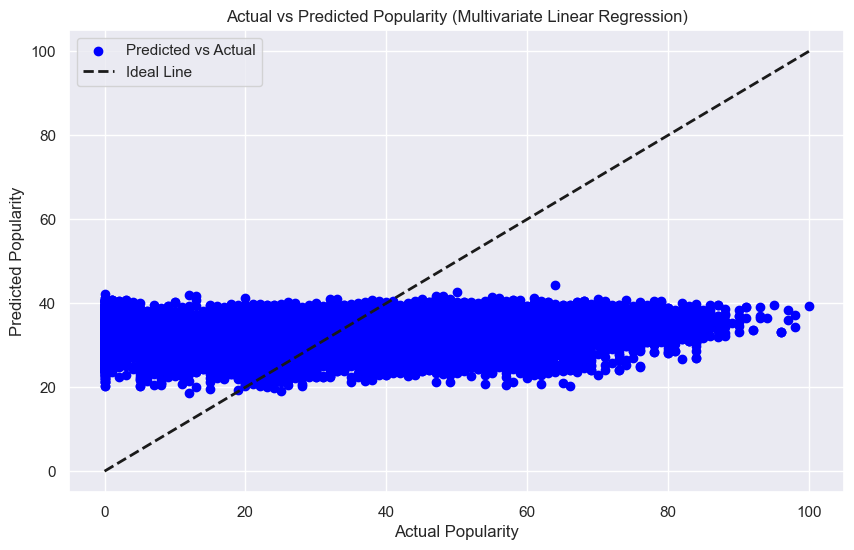

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# List of predictor columns (all numerical features you want to include)
predictor_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

# Prepare X and y
X = spotifyData[predictor_columns]  # Features (all selected columns)
y = spotifyData['popularity']       # Target variable (popularity)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print model details
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

# Predict on the test set
y_test_pred = linreg.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot Actual vs Predicted values for visual analysis
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label="Ideal Line")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Multivariate Linear Regression)")
plt.legend()
plt.show()


Intercept: 36.775568144883124
Coefficients: [ 9.04101589e+00 -2.76234801e+00  1.21571949e-01 -1.26366564e+01
 -9.78953201e-01 -8.16430118e+00  1.31241997e+00 -1.00335228e+01
  1.38633903e-02 -2.03954951e-06]


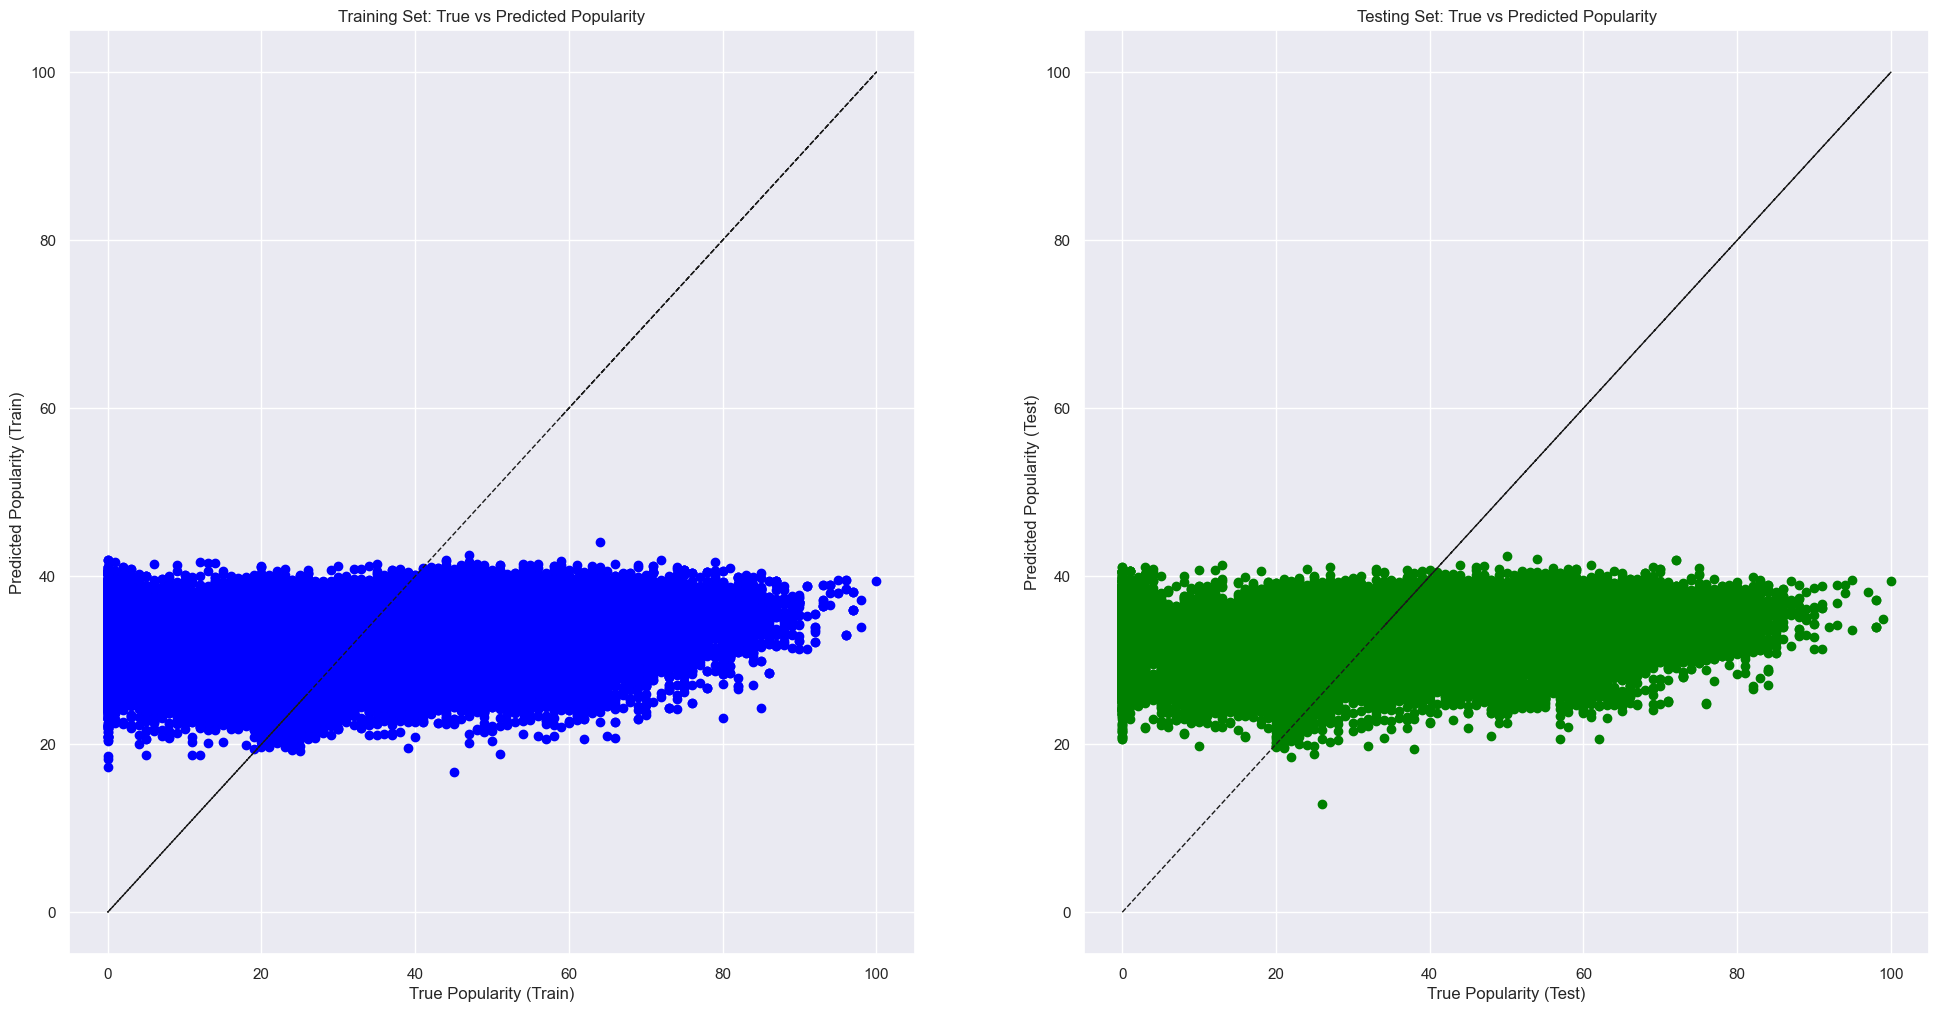

In [6]:
# List of predictor columns (all numerical features you want to include)
predictor_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

# Prepare X and y
X = spotifyData[predictor_columns]  # Features (all selected columns)
y = spotifyData['popularity']       # Target variable (popularity)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print model details
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

# Predict on the test set
y_test_pred = linreg.predict(X_test)

# Predict Popularity values for the Train and Test sets
popularity_train_pred = linreg.predict(X_train)
popularity_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for Training Data
axes[0].scatter(y_train, popularity_train_pred, color="blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'k--', linewidth=1)  # Ideal line for reference
axes[0].set_xlabel("True Popularity (Train)")
axes[0].set_ylabel("Predicted Popularity (Train)")
axes[0].set_title("Training Set: True vs Predicted Popularity")

# Plot for Testing Data
axes[1].scatter(y_test, popularity_test_pred, color="green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'k--', linewidth=1)  # Ideal line for reference
axes[1].set_xlabel("True Popularity (Test)")
axes[1].set_ylabel("Predicted Popularity (Test)")
axes[1].set_title("Testing Set: True vs Predicted Popularity")

plt.show()


## Polynomial Regression

Polynomial Regression (Degree 2) Results:
MSE: 472.26
R²: 0.05


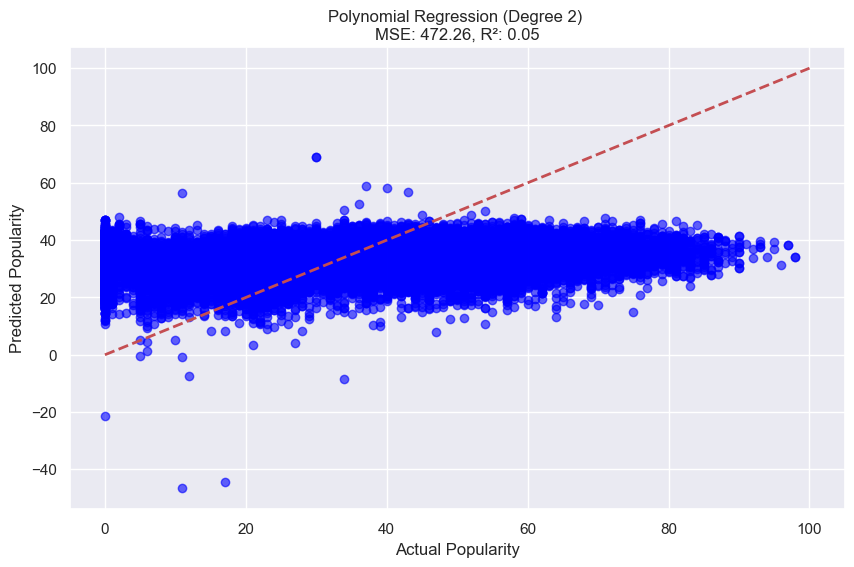

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
spotify_data = pd.read_csv('spotify.csv')  # Replace with your file path

# List of potential predictors
predictor_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

# Set polynomial degree
degree = 2

# Initialize PolynomialFeatures to transform the features
poly = PolynomialFeatures(degree=degree)

# Transform the predictor columns to include polynomial terms up to the specified degree
X_poly = poly.fit_transform(spotify_data[predictor_columns])
y = spotify_data['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25)

# Initialize a Linear Regression model
poly_reg_model = LinearRegression()

# Fit the model on the polynomial features
poly_reg_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = poly_reg_model.predict(X_test)

# Calculate MSE and R² for the polynomial regression
mse_poly = mean_squared_error(y_test, y_test_pred)
r2_poly = r2_score(y_test, y_test_pred)

# Print the results
print("Polynomial Regression (Degree 2) Results:")
print(f"MSE: {mse_poly:.2f}")
print(f"R²: {r2_poly:.2f}")

# Plot the actual vs predicted popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # Line for perfect predictions
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title(f"Polynomial Regression (Degree 2) \nMSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")
plt.show()


## Ridge and Lasso Regression
## Not used but kept here for future reference

In [17]:
from sklearn.linear_model import Ridge, Lasso

# Set the regularization strength
alpha = 1.0  # You can try different values like 0.1, 1.0, 10.0, etc.

# Prepare the data
X = spotify_data[predictor_columns]
y = spotify_data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Ridge Regression
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_test_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Ridge Regression Results (alpha={alpha}): MSE = {mse_ridge:.2f}, R² = {r2_ridge:}")

# Lasso Regression
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_test_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(f"Lasso Regression Results (alpha={alpha}): MSE = {mse_lasso:.2f}, R² = {r2_lasso:}")


Ridge Regression Results (alpha=1.0): MSE = 484.21, R² = 0.020873733918052806
Lasso Regression Results (alpha=1.0): MSE = 493.37, R² = 0.0023470147184196932
